In [129]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


import seaborn as sns
sns.set(style="ticks")




In [4]:
df = pd.read_json('../data/data.json')

In [9]:
df.groupby('acct_type').count()

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
acct_type,,,,,,,,,,,,,,,,,,,,,
fraudster,437,437,437,437,437,425,437,437,437,437,...,437,437,437,437,437,330,330,330,330,330
fraudster_att,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,4,4,4,4,4
fraudster_event,851,851,851,851,851,851,851,851,851,851,...,851,851,851,851,851,589,589,589,589,589
locked,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,51,51,51,51,51
premium,12373,12373,12373,12297,12373,12369,12373,12373,12373,12373,...,12373,12373,12373,12373,12373,11700,11700,11700,11700,11700
spammer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
spammer_limited,218,218,218,214,218,218,218,218,218,218,...,218,218,218,218,218,204,204,204,204,204
spammer_noinvite,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,82,82,82,82,82
spammer_warn,144,144,144,143,144,144,144,144,144,144,...,144,144,144,144,144,140,140,140,140,140


In [32]:
df['Fraud'] = df['acct_type'].str[0] == 'f'

In [33]:
df['Fraud']

0         True
1        False
2        False
3        False
4        False
         ...  
14332     True
14333    False
14334    False
14335    False
14336     True
Name: Fraud, Length: 14337, dtype: bool

In [35]:
df["Fraud"].sum()

1293

In [37]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'Fraud'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [52]:
df.groupby('country').count()

,acct_type,approx_payout_date,body_length,channels,currency,delivery_method,description,email_domain,event_created,event_end,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
country,,,,,,,,,,,,,,,,,,,,,
,316,316,316,316,316,316,316,316,316,316,...,316,316,316,316,287,287,287,287,287,316
A1,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,20,20,20,20,20,25
AE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AR,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
AT,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UY,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
VE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,1
VI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'Fraud'],
      dtype='object')

In [103]:
df['intl_trans'] = df['country'] != df['venue_country']

In [104]:
df['intl_trans']

0        False
1        False
2        False
3         True
4        False
         ...  
14332    False
14333    False
14334     True
14335    False
14336    False
Name: intl_trans, Length: 14337, dtype: bool

In [105]:
df_limited = df[['Fraud','user_created','user_age', 'num_payouts', 'intl_trans']]

/Users/taylorbritt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/taylorbritt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/taylorbritt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/taylorbritt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


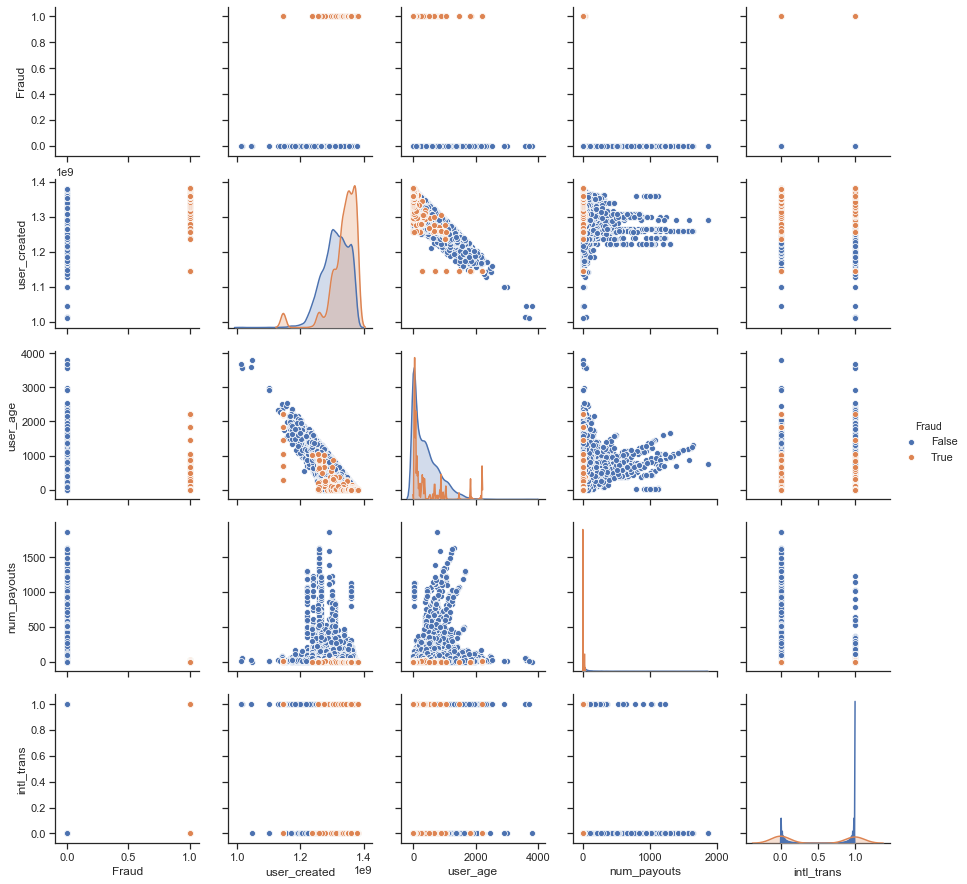

In [106]:
sns.pairplot(df_limited, hue="Fraud")

In [107]:
y = df_limited['Fraud']
X = df_limited.drop('Fraud', axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
#model = AdaBoostClassifier(n_estimators=100, random_state=0)
model = RandomForestClassifier(n_estimators = 500, n_jobs = -1)

In [150]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [151]:
preds = model.predict(X_test)

In [152]:
sum(preds)

398

In [153]:
sum(y_test)

426

In [154]:
recall_score(y_test, preds)

0.5492957746478874

In [155]:
precision_score(y_test, preds)

0.5879396984924623

In [156]:
f1_score(y_test, preds)

0.5679611650485438

In [157]:
accuracy_score(y_test, preds)

0.9247675401521556